In [ ]:
import pandas as pd
import numpy as np


## Library visualisasi
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
matplotlib.style.use('ggplot')
import scipy.stats as st # statiscal function

from PIL import Image

### Soal : 1. Tunjukkan statistika deskriptif untuk variabel harga rumah

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_price = df['SalePrice']
print(round(df_price.describe()))

count      1460.0
mean     180921.0
std       79443.0
min       34900.0
25%      129975.0
50%      163000.0
75%      214000.0
max      755000.0
Name: SalePrice, dtype: float64


* Pada dataframe diatas, terdapat 1460 data harga rumah.
* Pada data ini untuk ukuran pemusatan, kita gunakan **median**, dikarenakan kemungkinan cukup banyaknya data harga rumah yang tersedia memungkinkan terjadinya nilai outlier.
* Nilai median dapat kita lihat pada data ini adalah 163000
* Untuk melakukan pengukuran penyebaran, kali ini kita menggunakan **range**, dimana selisih antara nilai min dan max nya adalah 720100, hal ini berati terdapat gap yang cukup besar antara harga minimal dengan harga maksimalnya.
* Hal ini dapat kita interpretasikan bahwa dengan range yang cukup besar dan jarak antara nilai mean dan mediannya yang cukup tinggi, menunjukkan bahwa data memilik variabilitas yang signifikan, sehingga harus dipertimbangkan dengan baik dalam analisis lebih lanjut

### Soal 2 : Tunjukkan statistika deskriptif untuk variabel harga rumah (Column Name : SalePrice) setiap tahunnya (Column Name : YrSold)!

In [6]:
df_year = df.groupby('YrSold')['SalePrice'].describe()
df_year

,count,mean,std,min,25%,50%,75%,max
YrSold,,,,,,,,
2006,314.0,182549.458599,79426.838855,35311.0,131375.0,163995.0,218782.5,625000.0
2007,329.0,186063.151976,85768.171410,39300.0,129900.0,167000.0,219500.0,755000.0
2008,304.0,177360.838816,69735.610685,40000.0,131250.0,164000.0,207000.0,446261.0
2009,338.0,179432.103550,80879.237311,34900.0,125250.0,162000.0,212750.0,582933.0
2010,175.0,177393.674286,80451.280085,55000.0,128100.0,155000.0,213250.0,611657.0


* Dari data diatas, jumlah penjualan rumah dari tahun ketahun selalu mengalami perubahan, jumlah penjualan terbanyak terjadi pada tahun 2009 yaitu sebanyak 338 kali sedang jumlah penjualan paling sedikit terjadi pada tahu 2010 yaitu sebanyak 175 kali.
* Nilai pemusatan harga rumah jika dilihat berdasarkan mediannya, relative sama yaitu pada harga 160000 an
* Sedangkan nilai penyebaran harga rumah dapat kita lihat pada nilai standar deviasi nya sangat beragam pada setiap tahunnya
* Pada tahun 2010 jumlah penjualan rumah menurun sangat signifikan, hal ini kemungkian besar karena ***"The subprime mortgage crisis"*** yang terjadi pada saat itu.
* Namun meski angka penjualan pada tahun 2010 turun drastis, karena banyak pengusaha property yang mengalami kebangkrutan, tetapi rata-rata harga penjualannya masih normal.
* Pada data YearOnYear kali ini dapat kita interpretasikan bahwa dari tahun ke tahun penjualan property memiliki angka penjualan yang relative sama yaitu berkisar pada angka 300an, dan rata" harga penjualannya pun relative sama dari tahun ke tahun.

### Soal 3: Bagaimana distribusi harga rumah tersebut. Gunakan histogram plot tidak terbatas hanya histogram saja. Jelaskan sebaiknya untuk analisa apakah lebih baik menggunakan mean atau menggunakan median? Beserta alasannya (Column Name : SalePrice)

Text(0.5, 0, 'Harga Rumah')

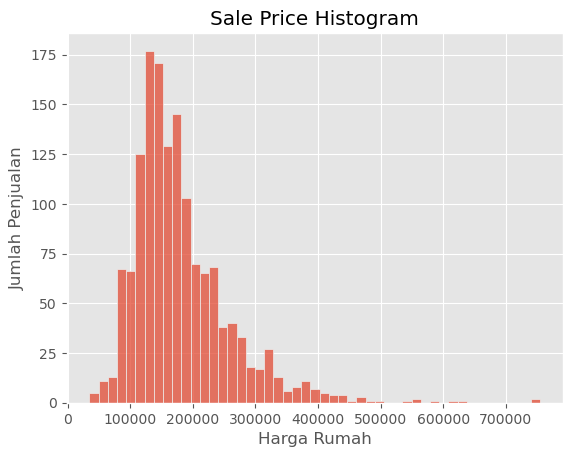

In [6]:
sns.histplot(df['SalePrice'])
plt.title('Sale Price Histogram')
plt.ylabel('Jumlah Penjualan')
plt.xlabel('Harga Rumah')

* Pada data diatas jika kita analisa menggunakan grafik yang ada, maka ada beberapa hal yang dapat menjadi perhatian kita :
    ~ harga rumah yang banyak di pilih oleh pembeli ada pada kisaran harga 120000 sampai dengan harga 180000 an., hal ini berarti harga rumah pada kisaran ini sangat terjangkau bagi pembeli.
    ~ sedangkan harga rumah yang menjadi pilihan kedua oleh pembeli ada kisaran harga 155000 an sampai dengan 165000 an. 
    ~ harga rumah kisaran 80000 sampai dengan 100000 dan kisaran 200000 sampai dengan 220000 menjadi pilihan kedua.
    ~ rumah dengan harga dibawah 80000 dan diatas 300000 masih sangat sedikit peminatnya

* Banyak nya data outlier dari harga rumah, contoh pada harga 240000 sampai dengan harga 280000, menjadikan **median** menjadi pilihan terbaik dalam menganalisa datanya, karena seperti diketahui bahwa median lebih tangguh terhadap nilai pencilan yang ada.

* Berdasarkan diagram histogram diatas, dapat kita intepretasikan bahwa sebaran data yang cenderung ke kanan, dapat diindikasikan bahwa rata-rata harga rumah lebih besar jika dibandingkan dengan nilai median maupun modusnya. 

### Soal 4 : Karena ada pernyataan bahwa setiap tahunnya harga rumah itu pasti naik. (tahun terjual : YrSold, harga rumah : SalePrice) Silahkan teman-teman buktikan dengan data yang ada menggunakan ilmu statistika? (Tidak terbatas pada pengujian apapun)

In [19]:
# Penentuan hipotesis statistika deskriptif menggunakan mean

df_mean = df.groupby('YrSold')['SalePrice'].mean().reset_index()
df_mean.columns = ['Year','Mean']
df_mean

,Year,Mean
0,2006,182549.458599
1,2007,186063.151976
2,2008,177360.838816
3,2009,179432.103550
4,2010,177393.674286


In [ ]:
# Pengujian terhadap hipotesis

df_06 = df[df['YrSold']== 2006]
df_07 = df[df['YrSold']== 2007]
df_08 = df[df['YrSold']== 2008]
df_09 = df[df['YrSold']== 2009]
df_10 = df[df['YrSold']== 2010]

anova_result = st.f_oneway(df_06['SalePrice'],
                           df_07['SalePrice'],
                           df_08['SalePrice'],
                           df_09['SalePrice'],
                           df_10['SalePrice'],)

anova_result

F_onewayResult(statistic=0.6455252211679311, pvalue=0.6300887663573457)

In [33]:
pvalue = anova_result.pvalue
print('P-value',pvalue)

P-value 0.6300887663573457


In [39]:
# Hasil Uji Hipotesis

if pvalue >= 0.5 :
    print('Terima H0 : Tidak cukup bukti bahwa rata-rata harga rumah setiap tahun naik, P_value : ',pvalue)
else :
    print('Terima H1 : Cukup bukti bahwa rata-rata harga rumah setiap tahun naik, P_value : ',pvalue )

Terima H0 : Tidak cukup bukti bahwa rata-rata harga rumah setiap tahun naik, P_value :  0.6300887663573457


_Interpretasi_

* Dalam hal ini, pernyataan bahwa setiap tahun harga rumah selalu naik adalah **salah**, karena jika kita lihat uji hipotesis terhadap rata-rata harga rumah YearOnYear sangat fluktuatif. 



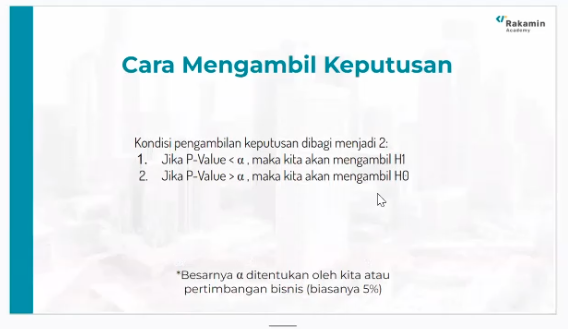

In [38]:
Image.open('H0_H1.png')

***add :***

*kesimpulan yang diambil berdasarkan teori disebut analisis* <br>
*kesimpulan berdasarkan penglihatan kasatmata pada data disebut intepretasi* <br>
*jika p_value > dr alpha maka : tidak cukup bukti bahwa rata-rata harga rumah setiap tahun naik*<br>
*jika p_value < dr alpha maka : cukup bukti bahwa rata-rata harga rumah setiap tahun naik*

### Soal 5 : Apakah jumlah campaign mampu meningkatkan keinginan user untuk membuka akun deposit atau tidak?

### 5.1 Pemahaman konsep A/B Testing

    a. Apa nama experimentnya?
    b. Definisikan Hipotesis 
    c. Siapa participant-nya?
    d. Variabel yang akan diuji apa?
    e. Metrics apa yang akan digunakan?
    f. Berapa sample size dan durasi experiment?


In [42]:
df_bank = pd.read_csv('bank-full.csv',engine='python',sep=None)
df_bank.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


a. Apa nama experimentnya?<br>
Deposit Campaign : yaitu membandingkan user yang menerima campaign kemudian membuka akun deposit dan user yang menerima campaign tetapi tidak membuka akun deposit 

b. Definisikan Hipotesis <br>
 H0 : User menerima campaign dari bank dan tertarik dengan campaign tersebut, maka user akan membuka akun deposit di bank tersebut <br>
 H1 : User menerima campaign dari bank tetapi tidak tertarik dengan campaign tersebut maka user tidak membuka akun deposit

c. Siapa participant-nya?

1. Kita dapat menjadikan nasabah bank tersebut sebagai participant, hal ini bertujuan bank dapat meningkatkan jumlah akun baru meskipun dari nasabah lama, keuntungannya nasabah lama lebih paham akan produk dari bank.
2. Menjadikan nasabah dari bank lain menjadi participant campaign, hal ini bertujuan untuk mengakuisisi nasabah bank lain untuk menjadi nasabah baru, keuntungannya user ini sudah familiar dengan produk perbankkan sehingga user dapat membandingkan produk perbankan antar abank.
3. Memberikan campaign kepada user yang sama sekali belum memiliki akun deposit di bank mana pun, keuntungannya bank dapat memperkenalkan produknya kepada user secara masive.

In [49]:
# d. Variabel yang akan diuji apa?
# Dalam hal ini variabel y akan dilakukan uji hipotesis

yes = df_bank[df_bank['y']=='yes']
yes.shape

(5289, 17)

In [50]:
no = df_bank[df_bank['y']=='no']
no.shape

(39922, 17)

* Dari data diatas terlihat 5289 user menerima campaign dan membuka akun deposit dan <br>
3992 user menerima campaign tetapi tidak membuka akun deosit

e. Metrics apa yang akan digunakan?<br>
Kita akan menggunakan rata-rata conversion rate dari user untuk menetapkan metricsnya 

In [54]:
yes['campaign'].mean()

2.1410474569861977

In [55]:
no['campaign'].mean()

2.8463503832473322

# f. Berapa sample size dan durasi experiment?

N = df_bank.shape[0]
e = 0.05

slovin = N / ( 1+N*e**2)
slovin

### 5.2 Pengujian Hipotesis

b. Penentuan hipotesis <br>
c. Pengujian yang digunakan <br>
d. Deteksi asumsi beserta cara penanganannya <br>
e. Hasil pengujian hipotesis <br>
f. Kesimpulan dan interpretasi <br>
 

 b. Penentuan hipotesis statistika deskriptif <br>
 H0 : User menerima campaign dari bank dan tertarik dengan campaign tersebut, maka user akan membuka akun deposit di bank tersebut <br>
 H1 : User menerima campaign dari bank tetapi tidak tertarik dengan campaign tersebut maka user tidak membuka akun deposit



In [65]:
# c. Pengujian yang digunakan

yes['campaign'].mean()

2.1410474569861977

In [62]:
no['campaign'].mean()

2.8463503832473322

d. Deteksi asumsi beserta cara penanganannya

ttest = st.ttest_ind(a = discount['gmv'], b=not_discount['gmv'])
p_value = ttest.pvalue

In [66]:
ttest = st.ttest_ind( a = yes['campaign'],b = no['campaign'] )
p_value = ttest.pvalue

print('P-Value :',p_value)

P-Value : 1.0123473642096295e-54


In [68]:
# e. Hasil pengujian hipotesis

if p_value >= 0.05 :
    print('Terima H0 : User menerima campaign dari bank dan tertarik dengan campaign tersebut, maka user akan membuka akun deposit di bank tersebut')

else :
    print('Terima H1 : User menerima campaign dari bank tetapi tidak tertarik dengan campaign tersebut maka user tidak membuka akun deposit')

Terima H1 : User menerima campaign dari bank tetapi tidak tertarik dengan campaign tersebut maka user tidak membuka akun deposit


In [70]:
# f. Kesimpulan dan interpretasi

# Dalam kasus ini, dapat di ambil kesimpulan bahwa rata-rata user yang menerima campaign tidak tertarik untuk membuka akun deposit